

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

In [32]:
import pandas as pd
data = pd.read_csv('adult.data',
                   skipinitialspace=True,
                   header=None, 
                   names=["age", "workclass", "fnlwgt", "education", 
                                       "education-num", "marital-status", "occupation", 
                                       "relationship", "race", "sex", "capital-gain", 
                                       "capital-loss", "hours-per-week", "native-country", "50K"])
data.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country    50K  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

### Вопрос 1
Сколько мужчин и женщин в выборке?

In [2]:
print('Кол-во мужчин: ', data[data.sex == "Male"]['sex'].count())
print('Кол-во женщин: ', data[data.sex == "Female"]['sex'].count())

Кол-во мужчин:  21790
Кол-во женщин:  10771


### Вопрос 2
Каков средний возраст мужчин?


In [3]:
data[data.sex == "Male"]['age'].mean()

39.43354749885268

### Вопрос 3
Какова доля граждан США?

In [76]:
all_people_num = len(data)
usa_people_num = len(data[data["native-country"] == "United-States"])
print(usa_people_num * 100 / all_people_num, "%")

89.5857006848684 %


### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

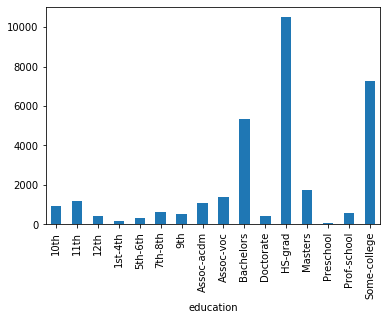

In [25]:
education_data = data.groupby('education')["education"].count()
education_data.plot.bar()


### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [30]:
mean = data[data["marital-status"] == "Divorced"].fnlwgt.mean()
std = data[data["marital-status"] == "Divorced"].fnlwgt.std()
print("Среднее:", mean)
print("Стандартное отклонение:", std)

Среднее: 185802.79045689848
Стандартное отклонение: 105646.78945933603


### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном(> 70%) имеют высшее образование?

In [77]:
# (кол-во людей, зар. > 50 K и имеющие ВО) / (кол-во людей, зар. > 50К) > 0,7
num_all = len(data[data["50K"] == ">50K"])
num_with_high_schhol = len(data[data["50K"] == ">50K"][data["education"] == "Bachelors"])
print(num_with_high_schhol * 100 / num_all, "%")
if (num_with_high_schhol / num_all) * 100 > 70:
    print("Yes")
else:
    print("No")

28.325468690218084 %
No


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [57]:
male = data[data.sex == "Male"].groupby('race').max().age
female = data[data.sex == "Male"].groupby('race').max().age

print("Мужчины")
print(male)
print()
print("Женщины")
print(female)

Мужчины
race
Amer-Indian-Eskimo    82
Asian-Pac-Islander    90
Black                 90
Other                 77
White                 90
Name: age, dtype: int64

Женщины
race
Amer-Indian-Eskimo    82
Asian-Pac-Islander    90
Black                 90
Other                 77
White                 90
Name: age, dtype: int64


### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [69]:
data[data.occupation == "Farming-fishing"]['native-country'].drop_duplicates()

16       United-States
255           Cambodia
500             Poland
771          Guatemala
861             Mexico
2353           England
3532                 ?
6006       Philippines
6559             Italy
8551       Puerto-Rico
11271          Vietnam
12621          Germany
15177            Japan
16486           Canada
20549       Yugoslavia
21145             Cuba
22391         Portugal
25761      El-Salvador
25943             Hong
28654          Ireland
29466           France
Name: native-country, dtype: object

### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [71]:
bac_male = len(data[data.sex == "Male"][data.education == "Bachelors"])
mas_male = len(data[data.sex == "Male"][data.education == "Masters"])

bac_female = len(data[data.sex == "Female"][data.education == "Bachelors"])
mas_female = len(data[data.sex == "Female"][data.education == "Masters"])

male = bac_male / mas_male
female = bac_female / mas_female

print(male, female)
if male > female:
    print("Male")
else:
    print("Female")

3.14743049705139 3.0205223880597014
Male


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [74]:
max_time = data["hours-per-week"].max()
num = len(data[data["hours-per-week"] == max_time])
salaries = data[data["hours-per-week"] == max_time]["50K"]
print("Max time:", max_time)
print("Amount:", num)
print(salaries)

Max time: 99
Amount: 85
935       >50K
1172      >50K
1887      >50K
3578      >50K
4086     <=50K
         ...  
30992    <=50K
31681     >50K
31699    <=50K
32469    <=50K
32531    <=50K
Name: 50K, Length: 85, dtype: object
